# Electif S7 : Simulation Numérique #

# Simulation d'événements rares #

**Travail à faire en binôme et à déposer sur l'espace Travaux Moodle prévu**

**Date-limite : 30/01/2025**

**Référent pédagogique pour ce travail : Christophe POUET**

**Indiquer ici les noms des deux élèves du binôme**
  * Elève 1 : PARANTHOEN Nolan
  * Elève 2 : ROUJOU Thomas

En probabilités/statistique, un événement rare est un événement dont la probabilité est très faible. Ce type d'événement se rencontre lors de l'évaluation de certains risques : probabilité d'une très forte crue, risque d'une forte perte financière pour un organisme financier pouvant mettre en cause sa survie,...

L'objectif de ce travail est d'évaluer la probabilité d'un événement rare par deux méthodes :
  * par la méthode de Monte-Carlo directe,
  * par la méthode de Monte-Carlo avec échantillonnage préférentiel.
  
Ce travail montre ce qui peut être fait dans des cas simples où le résultat exact est connu et peut être généralisé à des cas où le résultat exact n'est pas connu.



### Préliminaire ###

La cellule ci-dessous permet de charger les bibliothèques Python nécessaires. Vous pouvez ajouter des bibliothèques si vous le souhaitez.

In [ ]:
# Python useful libraries
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Bac à sable ###

La cellule ci-dessous vous permet de tester des morceaux de code.

In [ ]:
# Sandbox to test code



### Partie 1 : événement rare pour la loi gaussienne standard ###

Soit $X \sim \mathcal{N}(0,1)$ dont la densité est notée $f(\cdot)$ ci-dessous. Le but de cette partie est d'estimer la probabilité
$$ p =  \mathbb{P}( X \geq 6 ).$$

*Question :* A l'aide de la bibliothèque *scipy.stats*, évaluer la valeur de $p$.

In [ ]:
# Calcul direct de p
from scipy.stats import norm
mu = 0
sigma = 1
q = norm.cdf(6)
p = 1-q
print(p)


9.865877004244794e-10


*Question :* Estimer la valeur de $p$ par la méthode de Monte-Carlo directe. Vous illustrerez graphiquement votre résultat pour différentes tailles d'échantillon de simulation (prendre par exemple $n=10, 50, 100, 500, 1000$). Comparer les résultats obtenus avec la valeur fournie par la bibliothèque *scipy.stats*.

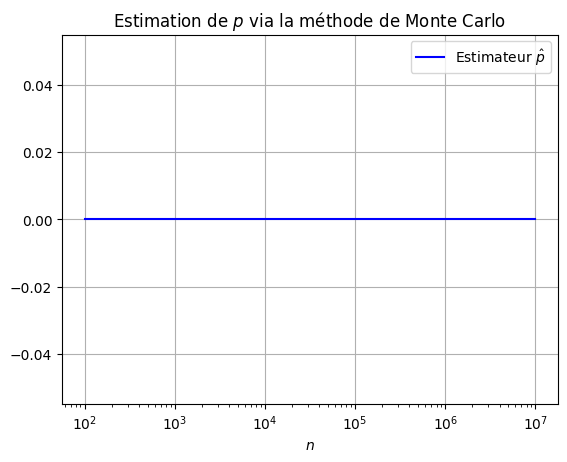

In [ ]:
# Méthode de Monte Carlo pour approximer p
def monte_carlo(n):
  x = np.random.normal(0,1,n)
  s = np.sum(x >= 6)
  return s/n

valeurs_n = np.logspace(2, 7, 100, dtype=int)
P_chap=[]
for n in valeurs_n:
    p_chap = monte_carlo(n)
    P_chap.append(p_chap)
plt.plot(valeurs_n, P_chap, label=r"Estimateur $\hat{p}$", color='blue')
plt.xscale("log")
plt.xlabel('$n$')
plt.legend()
plt.title('Estimation de $p$ via la méthode de Monte Carlo')
plt.grid()
plt.show()

On remarque qu'il faut prendre $n$ très grand, aux alentours de $10^9$, pour voir apparaître les premières occurences de $X \geq 6$.

On choisit $T \sim \mathcal{E}(1)$ et $Y=6+T$.

*Question :* Quelle est la loi de la v.a. $Y$? Il est seulement demandé la densité (notée $g(\cdot)$ ci-dessous), le détail du calcul pour parvenir cette densité n'est pas demandé.

*Réponse à la question sur la loi de $Y$:* \\
La variable aléatoire $Y$ suit une loi de densité de probabilité : $$
g(y) = e^{-(y-6)} \mathbb{1}_{y \geq 6}
$$

*Question :* En utilisant la v.a. $Y$, estimer la valeur de $p$  par échantillonnage préférentiel. Vous illustrerez graphiquement votre résultat pour différentes tailles d'échantillon de simulation comme à la seconde question (le graphe devra faire apparaître la valeur estimée de $p$). Comparer les résultats obtenus avec la valeur fournie par la bibliothèque *scipy.stats*.

On se rappellera que
$$ \mathbb{E}( \mathbf{1}_{ X \geq 6 } ) = \mathbb{E}\Big( \mathbf{1}_{ Y \geq 6 } \frac{f(Y)}{g(Y)} \Big).$$

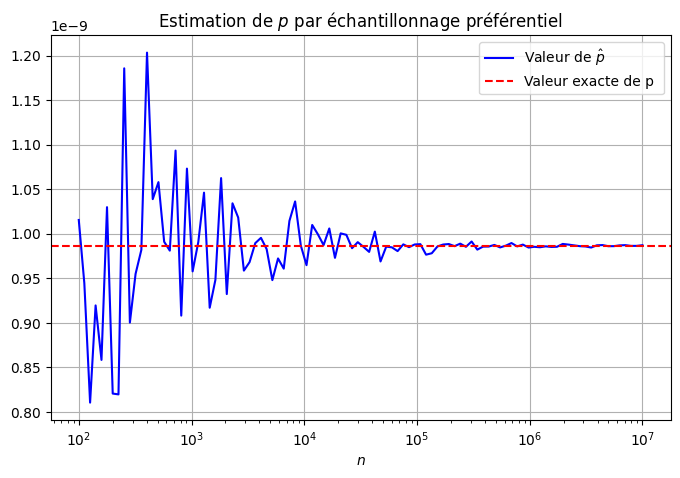

In [ ]:
# Méthode de Monte Carlo avec échantillonnage préférentiel pour approximer p

from scipy.stats import norm
mu = 0
sigma = 1
q = norm.cdf(6)
p = 1-q


def echantillonnage(n):
    T = np.random.exponential(scale=1, size=n)
    Y = T + 6

    f_Y = stats.norm.pdf(Y, loc=0, scale=1)
    g_Y = np.exp(-(Y - 6))

    poids = f_Y / g_Y

    return np.mean(poids)


valeurs_n = np.logspace(2, 7, 100, dtype=int)
P_chap = [echantillonnage(n) for n in valeurs_n]

plt.figure(figsize=(8, 5))
plt.plot(valeurs_n, P_chap, label=r"Valeur de $\hat{p}$", color='blue')
plt.axhline(y=p, color='red', linestyle='--', label=f"Valeur exacte de p ")
plt.xscale("log")
plt.xlabel('$n$')
plt.legend()
plt.grid()
plt.title("Estimation de $p$ par échantillonnage préférentiel")
plt.show()



L'échantillonnage préférentiel avec $Y$ nous permet de concentrer les simulations sur la région $X \geq 6$, rendant l'estimation beaucoup plus efficace. On remarque en effet que la convergence se fait plus rapidement, à partir de $n=10^5$.

### Partie 2 : événement rare pour la loi de Pareto ###

Soit $X$ une v.a. suivant la loi de Pareto de paramètre $3$, dont la densité est
$$ f(x) = \frac{3}{x^{4}} \ \mathbf{1}_{x \geq 1 }.$$
Le but de cette partie est d'estimer la probabilité avec une méthode de Monte-Carlo.
$$ p = \mathbb{P}( X \geq 10 ).$$

*Question :* Calculer la valeur exacte de $p$. Vous calculerez d'abord la fonction de répartition de la v.a. $X$ puis vous effectuerez le calcul exact de la valeur de $p$.

*Réponse à la question sur la valeur exacte de $p$ :*  
Notons $F$ la fonction de répartition associée à $f$. \\
En fait, $$p = \mathbb{P}(X \geq 10) = 1 - \mathbb{P}(X<10) = 1 - F(10)$$ \\
Or $$F(x)=\int_{-\infty}^{x}f(y)dy = \mathbb{1}_{x>1}\int_{-\infty}^{x}\frac{3}{y^4}dy = (1 - x^{-3})\mathbb{1}_{x>1}$$ \\
D'où :
$$
p = 10^{-3}
$$

*Question :* Estimer la valeur de $p$ par la méthode de Monte-Carlo directe et donner un intervalle de confiance asymptotiquement de niveau $95\%$. Vous illustrerez graphiquement votre résultat pour différentes tailles d'échantillon de simulation (par exemple avec les mêmes tailles que celles proposées dans la partie 1); le graphe devra faire apparaître la valeur estimée de $p$ ainsi que les bornes supérieure et inférieure de l'intervalle de confiance. Comparer les résultats obtenus avec la valeur que vous avez calculée directement.

In [ ]:
# Méthode de Monte Carlo pour générer les variables aléatoires de loi de Pareto
def monte_carlo2(n):
  x = np.random.pareto(3,n)
  s = np.sum(x >= 10)
  return s/n

print(monte_carlo2(10000))

0.0009



Notons $\hat{p}$ l'estimateur de $p$.

On peut approximer $p$ via le calcul de $\hat{p}$ :

$$
\hat{p} = \frac{1}{n} \sum_{i=1}^{n} \mathbb{1}_{X_i \geq 10}
$$

Le théorème central limite stipule que pour $n$ assez grand :

$$
\sqrt{n} \cdot  \frac{\hat{p} - \mu}{\sigma} \xrightarrow{\mathcal{L}} Z \sim \mathcal{N}(0,1)
$$

Avec :

$$
\mu = \mathbb{E}(\mathbb{1}_{X_i \geq 10}) =\mathbb{P}(X_i \geq 10) = p
$$

et

$$
\sigma^2 = \mathbb{V}(\mathbb{1}_{X_i \geq 10}) = \mathbb{E}(\mathbb{1}_{X_i \geq 10}^2) - \mathbb{E}(\mathbb{1}_{X_i \geq 10})^2
$$

$$
= p - p^2 = p(1 - p)
$$

Dans ce cas, on sait que, pour la loi normale standard, l'intervalle de confiance est donné par :

$$
\mathbb{P}(-1,96 \leq Z \leq 1,96) = 0,95
$$

D'où :

$$
\mathbb{P}\left(-1,96 \leq \frac{\sqrt{n} (\hat{p} - p)}{\sqrt{p(1-p)}} \leq 1,96\right) = 0,95
$$

Soit :

$$
\mathbb{P}\left(p - 1,96 \frac{\sqrt{p(1-p)}}{\sqrt{n}} \leq \hat{p} \leq p + 1,96 \frac{\sqrt{p(1-p)}}{\sqrt{n}} \right) = 0,95
$$

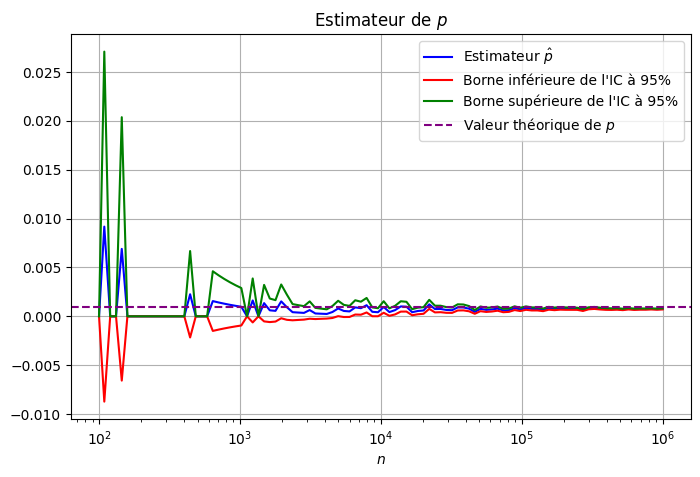

In [ ]:
# Code pour tracer l'estimateur de p et son intervalle de confiance à 95%


def IC(p_chap, n):
    erreur = 1.96 * np.sqrt(p_chap * (1 - p_chap) / n)
    return p_chap - erreur, p_chap + erreur

valeurs_n = np.logspace(2, 6, 100, dtype=int)  # n variant de 10^2 à 10^6
P_chap = []
borne_inf = []
borne_sup = []

for n in valeurs_n:
    p_chap = monte_carlo2(n)
    P_chap.append(p_chap)
    inf, sup = IC(p_chap, n)
    borne_inf.append(inf)
    borne_sup.append(sup)

plt.figure(figsize=(8,5))
plt.plot(valeurs_n, P_chap, label=r"Estimateur $\hat{p}$", color='blue')
plt.plot(valeurs_n, borne_inf, color='red', label="Borne inférieure de l'IC à 95%")
plt.plot(valeurs_n, borne_sup, color='green', label="Borne supérieure de l'IC à 95%")
plt.axhline(y=0.001, color='purple',linestyle="dashed", label="Valeur théorique de $p$")
plt.xscale("log")
plt.xlabel("$n$")
plt.title("Estimateur de $p$")
plt.legend()
plt.grid()
plt.show()

On remarque que l'estimateur $\hat{p}$ converge bel et bien vers la valeur théorique $p=10^{-3}$ lorsque $n \rightarrow +\infty$.

*Question :* Utiliser une v.a. $Y$ dont la loi est une exponentielle translatée en vous inspirant de ce qui a été fait dans la partie 1 pour estimer $p$ par la méthode d'échantillonnage préférentiel. Donner un intervalle de confiance asymptotiquement de niveau $95\%$. Vous illustrerez graphiquement votre résultat pour différentes tailles d'échantillon de simulation (par exemple avec les mêmes tailles que celles proposées dans la partie 1); le graphe devra faire apparaître la valeur estimée de $p$ ainsi que les bornes supérieure et inférieure de l'intervalle de confiance. Comparer les résultats obtenus avec la valeur que vous avez calculée directement. Est-ce que pour une même taille d'échantillon de simulation la méthode de Monte-Carlo avec échantillonnage préférentiel apporte un gain (diminution de la taille de l'intervalle de confiance) par rapport à la méthode de Monte-Carlo directe?

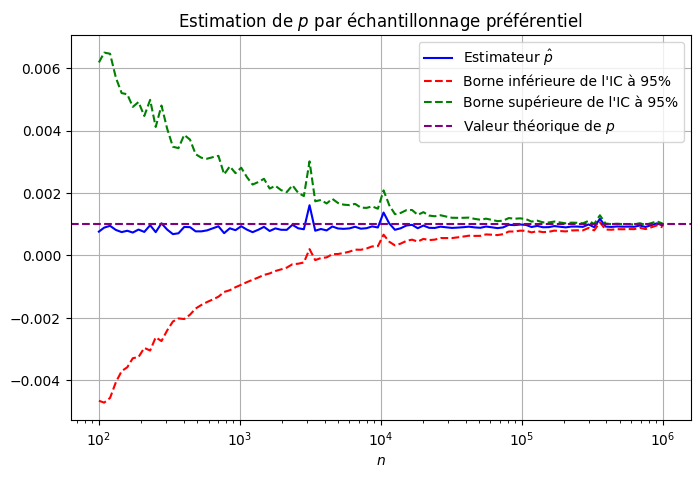

In [ ]:
# Code pour tracer l'estimateur de p et son intervalle de confiance à 95% avec la méthode d'échantillonnage préférentiel

p = 10e-3

def IC(p_chap, n):
    erreur = 1.96 * np.sqrt(p_chap * (1 - p_chap) / n)
    return p_chap - erreur, p_chap + erreur


def echantillonnage(n):
    T = np.random.exponential(scale=1, size=n)
    Y = T + 10                                    #Sachant que l'on cherche p = P(X>10), on choisit cette fois une loi exponentielle translatée de 10

    f_Y = 3 / (Y**4)
    g_Y = np.exp(-(Y - 10))

    poids = f_Y / g_Y

    return np.mean(poids)

valeurs_n = np.logspace(2, 6, 100, dtype=int)
P_chap = []
borne_inf = []
borne_sup = []

for n in valeurs_n:
    p_chap = echantillonnage(n)
    P_chap.append(p_chap)
    inf, sup = IC(p_chap, n)
    borne_inf.append(inf)
    borne_sup.append(sup)


plt.figure(figsize=(8,5))
plt.plot(valeurs_n, P_chap, label=r"Estimateur $\hat{p}$", color='blue')
plt.plot(valeurs_n, borne_inf, color='red', linestyle="dashed", label="Borne inférieure de l'IC à 95%")
plt.plot(valeurs_n, borne_sup, color='green', linestyle="dashed", label="Borne supérieure de l'IC à 95%")
plt.axhline(y=p_true, color='purple', linestyle="dashed", label=f"Valeur théorique de $p$ ")
plt.xscale("log")
plt.xlabel("$n$")
plt.title("Estimation de $p$ par échantillonnage préférentiel")
plt.legend()
plt.grid()
plt.show()



Dans cet exemple, où la convergence s'obtenait assez rapidement avec la méthode classique de Monte Carlo, l'échantillonnage préférentiel n'améliore sensiblement ni la vitesse de convergence vers la limite, ni la vitesse de rétrecissement de l'intervalle de confiance.